<a href="https://colab.research.google.com/github/ommishra0707/Bike_Sharing_Demand_Prediction/blob/main/Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime as dt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from scipy.stats import zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/Copy of SeoulBikeData.csv'
seoul_df = pd.read_csv(file_path, index_col = False, encoding='unicode_escape')

In [4]:
# printing shape
print("Shape of the Dataset:", seoul_df.shape)

Shape of the Dataset: (8760, 14)


In [5]:
# using head function to get first 5 rows
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# To get the descriptive summary of dataset
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# studying the information about columns and non-null values
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# checking if any null values are present in our dataset
count_of_null_values = seoul_df.isnull().sum()
count_of_null_values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values in the Dataframe

In [9]:
# checking duplicates in our dataset
value=len(seoul_df[seoul_df.duplicated()])
print("Total no. of duplicates = ",value)

Total no. of duplicates =  0


As we can see there are no duplicates in our dataset

In [10]:
# count of unique elements in each column
seoul_df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [11]:
# converting the type of Hour column into category
seoul_df['Hour'] = seoul_df['Hour'].astype('category')

## Exploratory Data Analysis

In [12]:
# setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

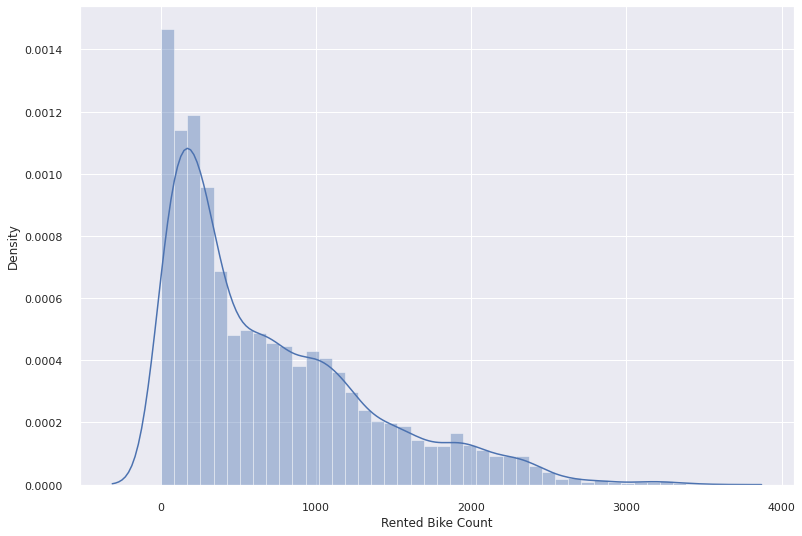

In [13]:
# plotting distribution plot for our dependent variable
sns.distplot(seoul_df['Rented Bike Count'])

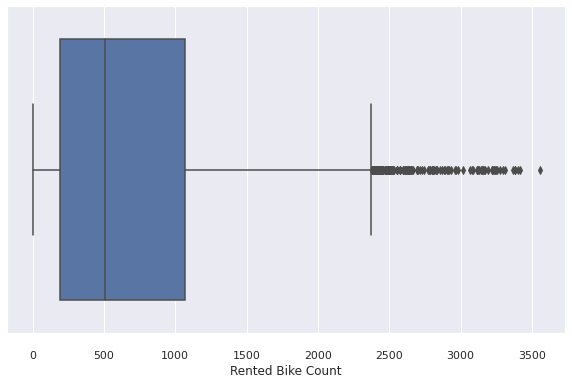

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x=seoul_df['Rented Bike Count'])
plt.show()

We can see the positive skewness in the graph and the outliers on the right side of the box plot as well for our dependent variable. We can use square-root or log transformation to remove positive skewness from the distribution.

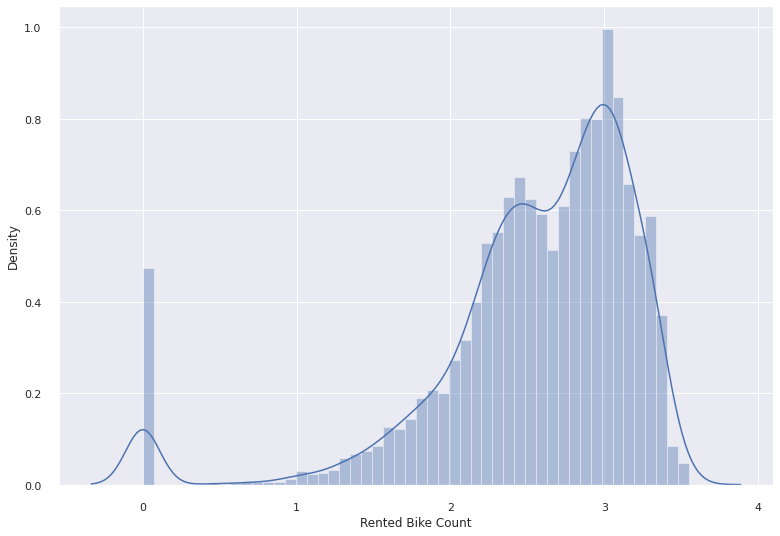

In [15]:
# plotting distribution plot for the log-transformed dependent variable
ax = sns.distplot(np.log10(seoul_df['Rented Bike Count']+1))

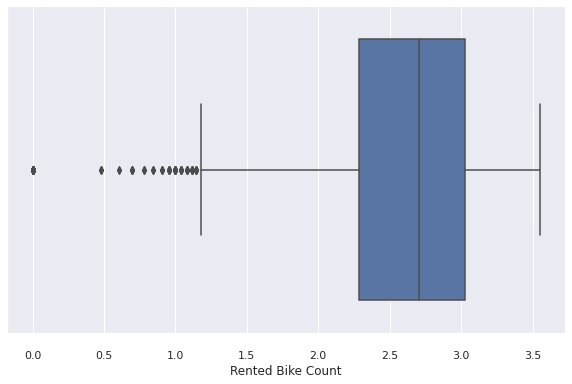

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=np.log10(seoul_df['Rented Bike Count']+1))
plt.show()

We are not able to remove skewness using log transformation as now it is negatively skewed which is also confirmed by the box plot.
<br>
Trying square-root transformation.

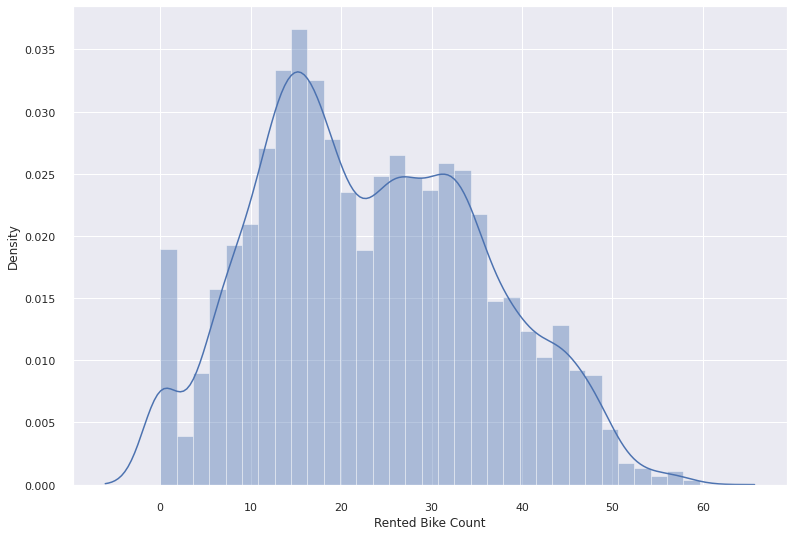

In [17]:
# plotting distribution plot for square-root of dependent variable
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']))

As we can see we are able to remove positive skewness from our distribution using square-root transformation.

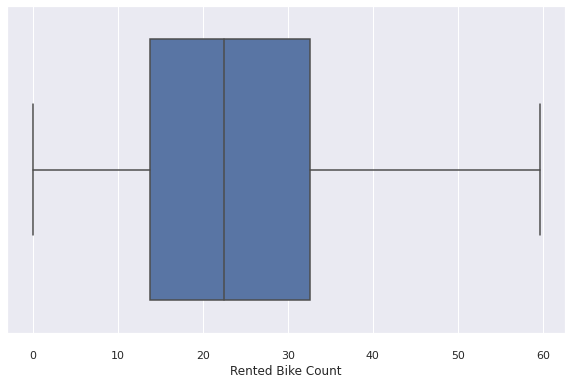

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x=np.sqrt(seoul_df['Rented Bike Count']))
plt.show()

We can see that there are no outliers present in the box plot also.

## Understanding numerical features

In [19]:
# finding numerical_features from the dataset
numerical_features = seoul_df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

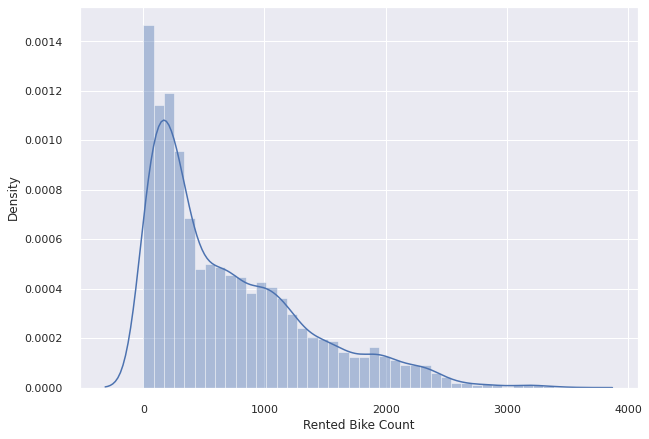

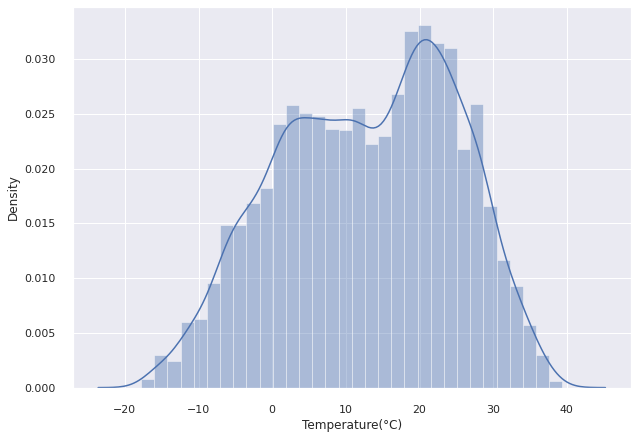

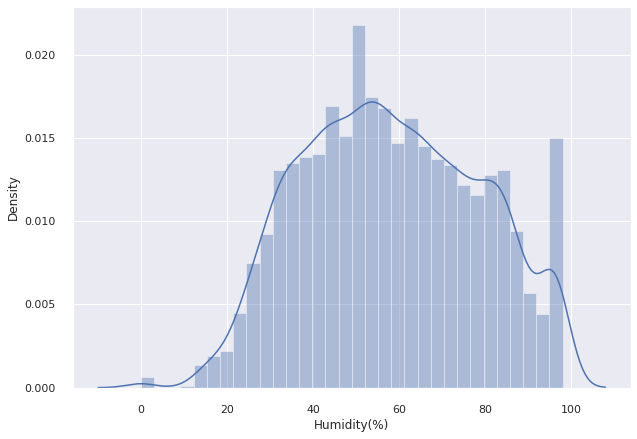

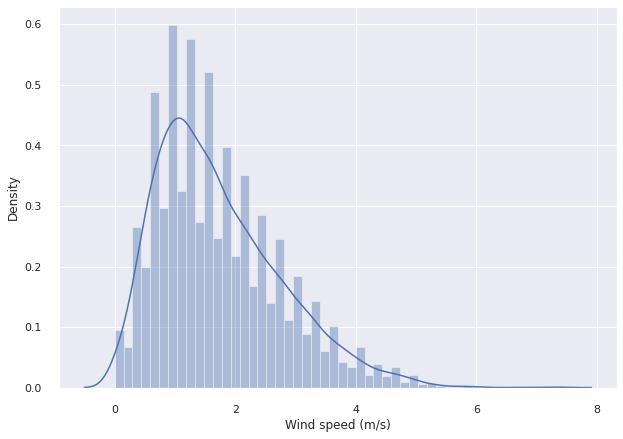

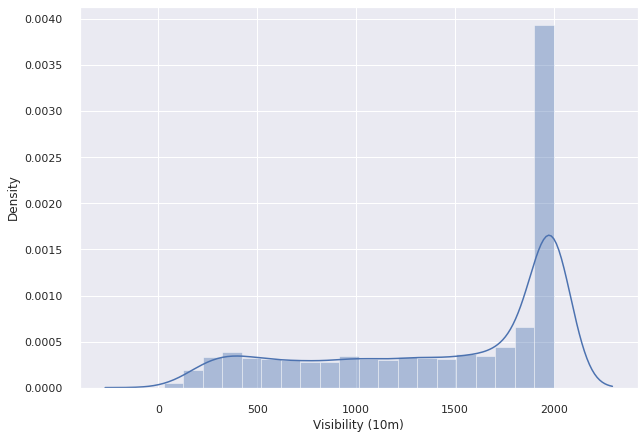

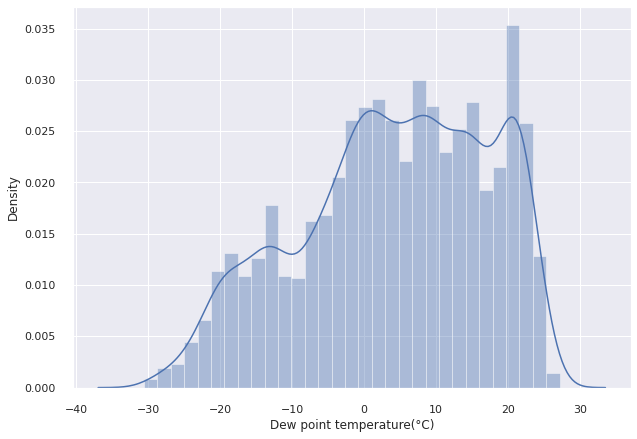

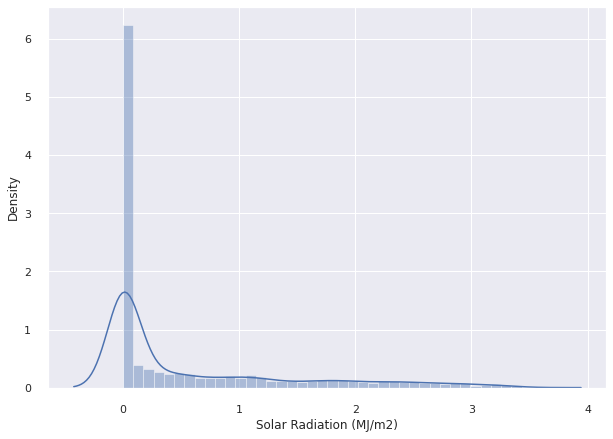

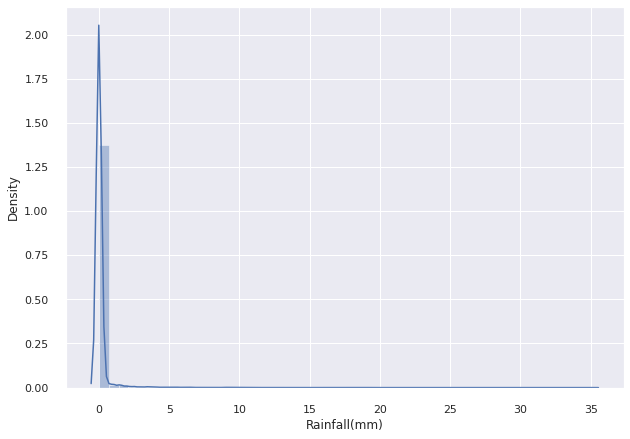

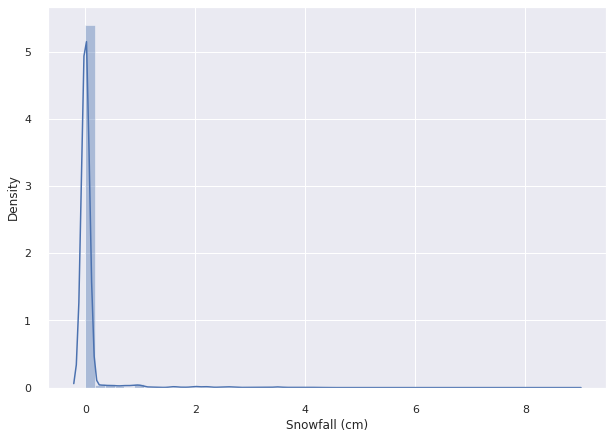

In [20]:
for col in numerical_features:
  plt.figure(figsize=(10,7))
  sns.distplot(x=seoul_df[col])
  plt.xlabel(col)
plt.show()

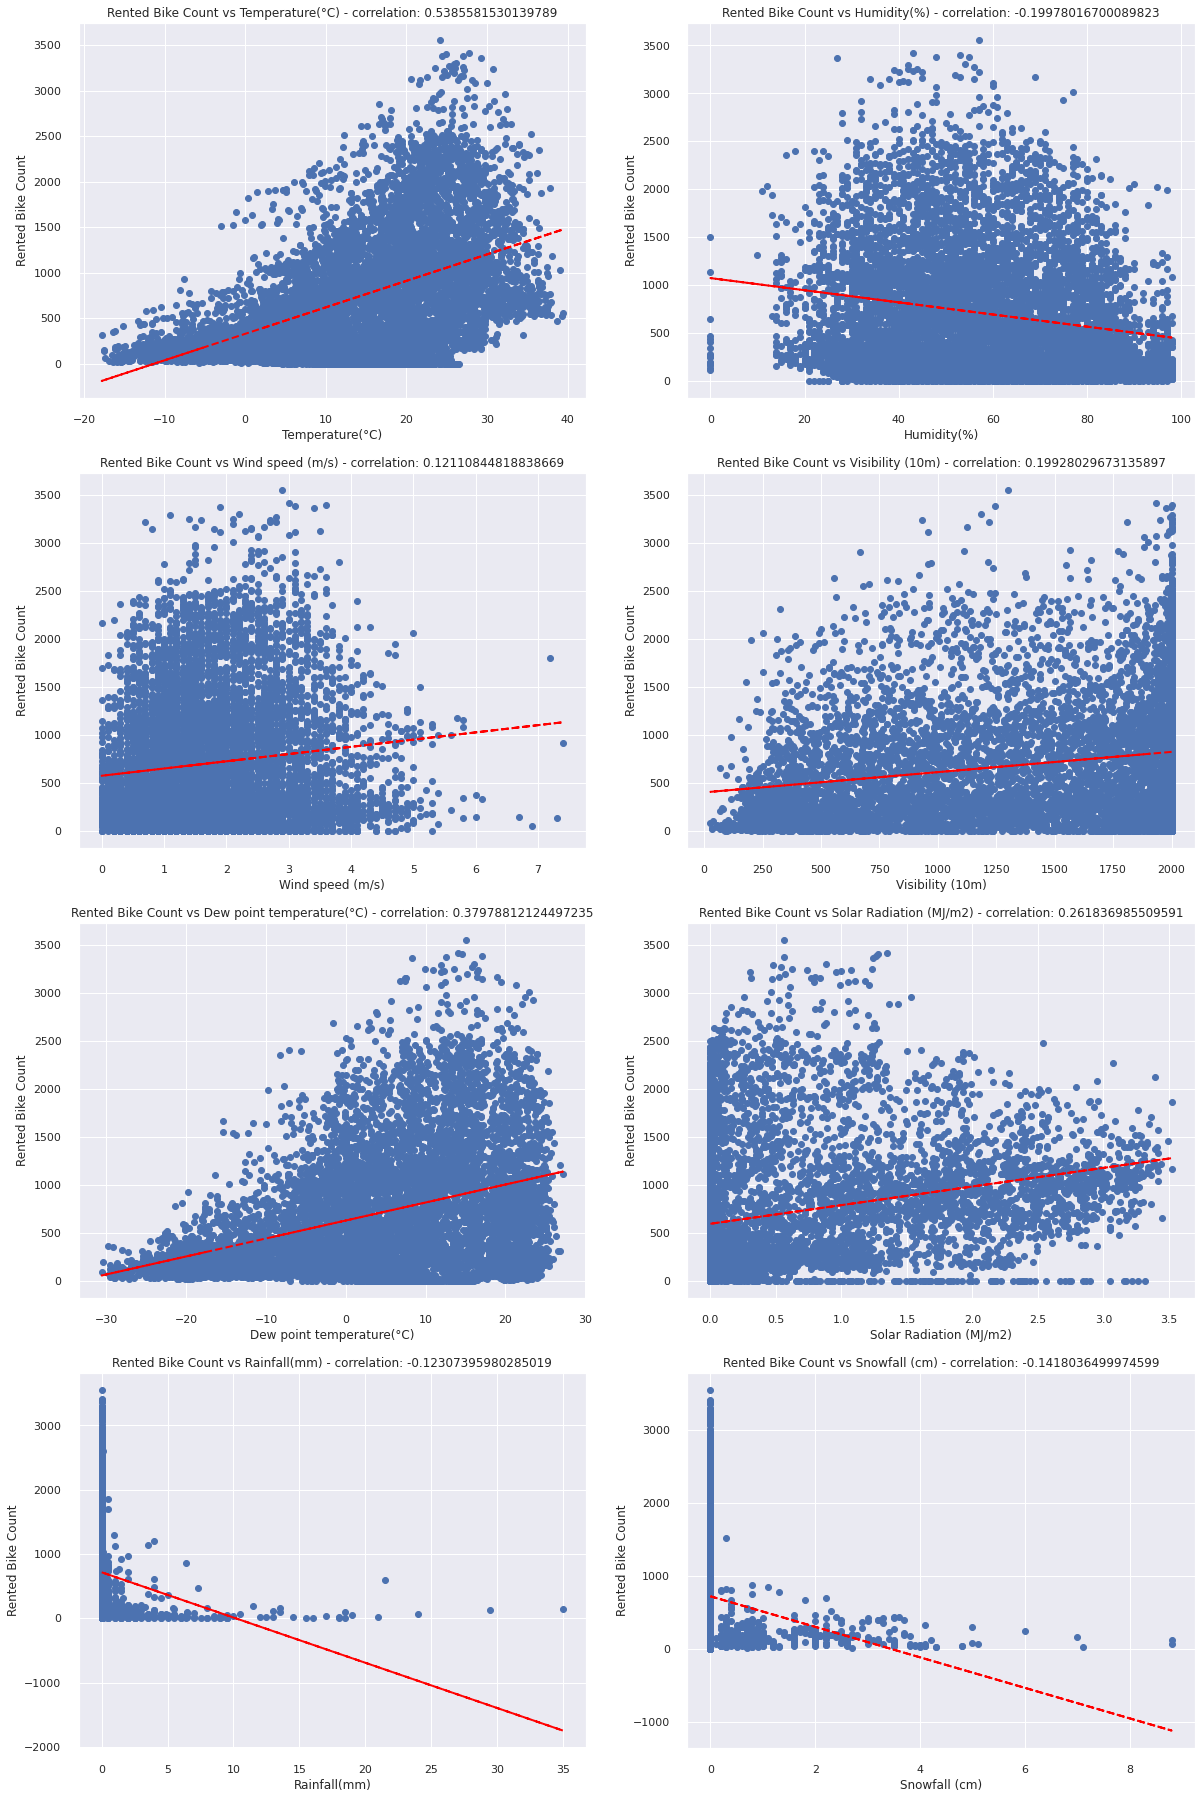

In [21]:
# plotting scatter plot to understand the relationship between dependent and independent variables
i = 0
plt.figure(figsize=(20, 40))
for feature in numerical_features[1:]:
    ax = plt.subplot(5, 2, i+1)
    independent_var = seoul_df[feature]
    dependent_var = seoul_df['Rented Bike Count']
    correlation = independent_var.corr(dependent_var)
    plt.scatter(x = independent_var, y = dependent_var)
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + feature + ' - correlation: ' + str(correlation))
    z = np.polyfit(independent_var, dependent_var, 1)
    y_pred = np.poly1d(z)(independent_var)
    plt.plot(independent_var, y_pred, color = 'red', linestyle = 'dashed', linewidth = 2)
    i += 1
    
plt.show()

<br>

### Inference: 

*  #### Rented Bike Count increases, when temperature increases.

*  #### Rented Bike Count is low when the percentage of humidity is high in the air.
*  #### Also the demand for the rented bike is very high when rainfall and snowfall are low.

#### From the above graphs, we can see a few outliers in Humidity, Wind speed, Rainfall and Snowfall features.
<br>

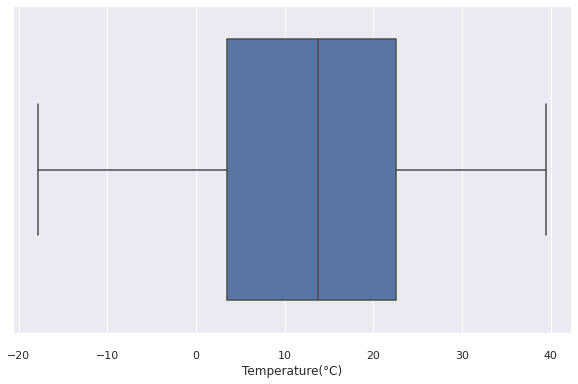

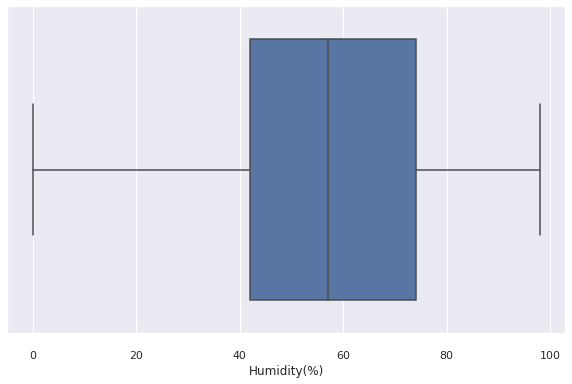

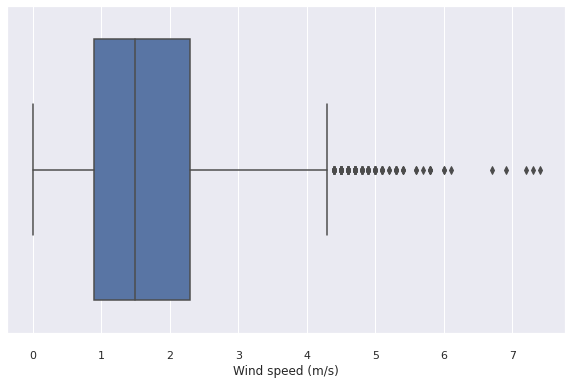

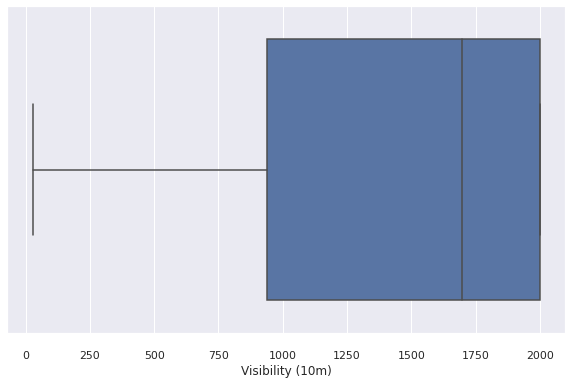

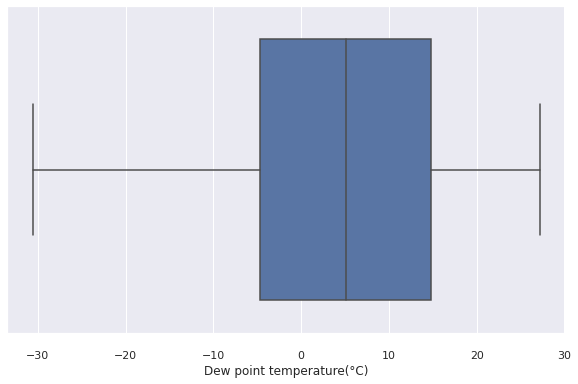

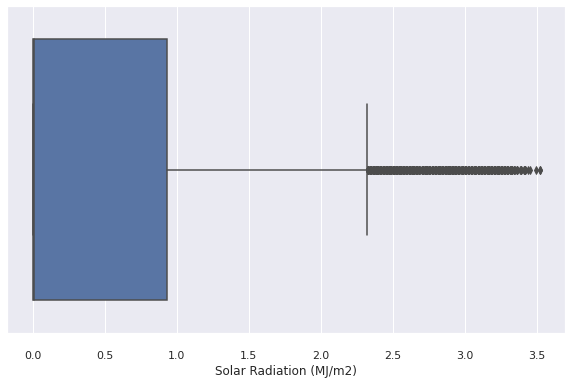

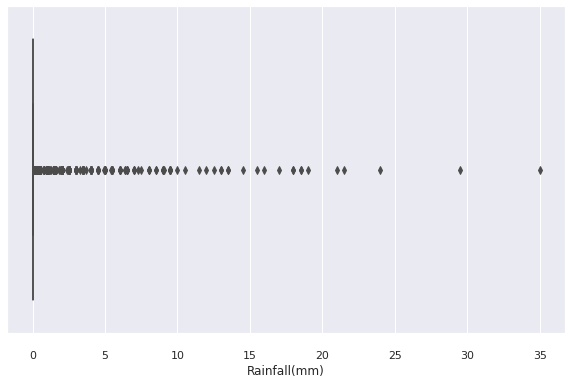

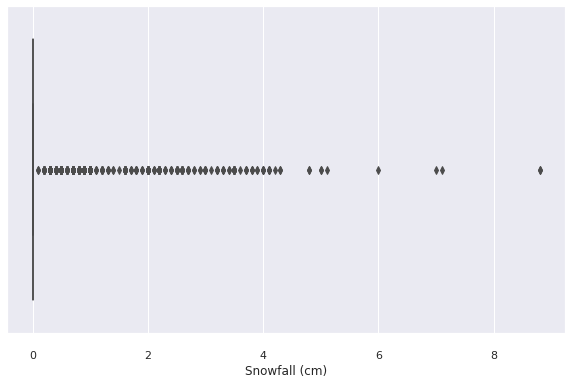

In [22]:
# plotting the box plot for numerical_features
for feature in numerical_features[1:]:
    plt.figure(figsize=(10,6))
    sns.boxplot(x = seoul_df[feature])
plt.show()

#### From the above box plot as well, we see that there are outliers present in Wind speed, Solar Radiation, Rainfall and Snowfall features.

### Removing outliers from our dataset

In [23]:
# renaming columns
seoul_df.rename(columns = {'Temperature(°C)': 'Temperature', 'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Wind speed', 'Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew point temperature', 'Solar Radiation (MJ/m2)': 'Solar Radiation', 'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall'}, inplace = True)

In [24]:
# finding numerical_features from the dataset
numerical_features = seoul_df.describe().columns

In [25]:
# count of outliers for Humidity
seoul_df[seoul_df['Humidity'] == 0]['Humidity'].count()

17

In [26]:
# count of outliers for Wind speed
seoul_df[seoul_df['Wind speed'] >= 4.5]['Wind speed'].count()

144

In [27]:
# count of outliers for Solar Radiation
seoul_df[seoul_df['Solar Radiation'] >= 2.5]['Solar Radiation'].count()

499

In [28]:
# count of outliers for Rainfall
seoul_df[seoul_df['Rainfall'] >= 10]['Rainfall'].count()

23

In [29]:
# count of outliers for Snowfall
seoul_df[seoul_df['Snowfall'] >= 4]['Snowfall'].count()

21

In [30]:
# removing outliers
seoul_df = seoul_df[seoul_df['Humidity'] > 0]
seoul_df = seoul_df[seoul_df['Wind speed'] < 4.5]
seoul_df = seoul_df[seoul_df['Solar Radiation'] < 2.5]
seoul_df = seoul_df[seoul_df['Rainfall'] < 10]
seoul_df = seoul_df[seoul_df['Snowfall'] < 4]

### Checking multicollinearity

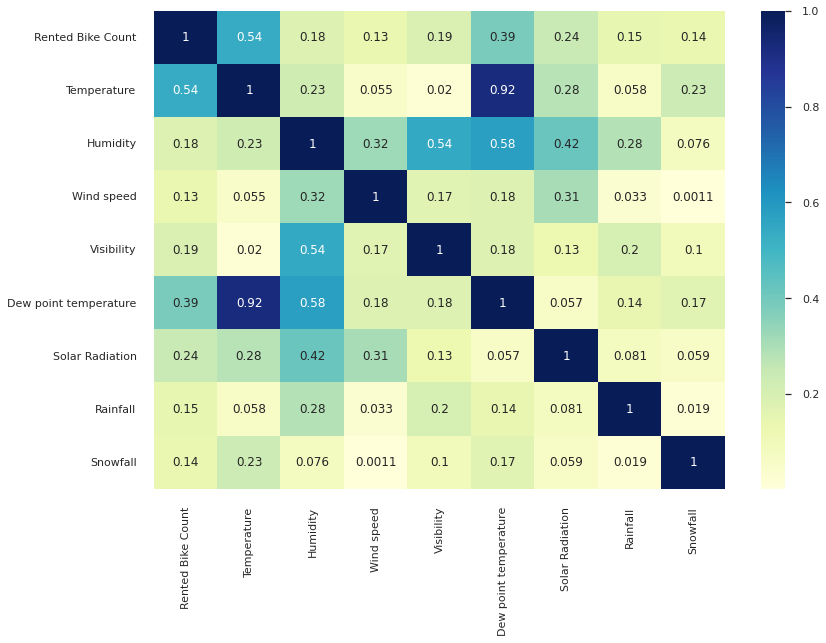

In [31]:
# Correlation between numerical features using heatmap
ax = sns.heatmap(abs(seoul_df[numerical_features].corr()), annot = True, cmap="YlGnBu")

Inference: <br>
We can see a high correlation between **Temperature** and **Dew point temperature** with a value of 0.91.
<br>
We can drop either of the two but since **Temperature** has more correlation with **Rented Bike Count** in comparison to **Dew point temperature**. So we will drop the **Dew point temperature** feature.

In [32]:
# Checking multicollinearity by calculating VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["independent_variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [33]:
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count']]])

,independent_variables,VIF
0,Temperature,28.012254
1,Humidity,5.294308
2,Wind speed,4.640317
3,Visibility,8.924843
4,Dew point temperature,15.725322
5,Solar Radiation,2.363219
6,Rainfall,1.120123
7,Snowfall,1.124131


In [34]:
# removing the Dew point temperature to check VIF as it has less correlation with our dependent variable
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count', 'Dew point temperature']]])

,independent_variables,VIF
0,Temperature,2.899187
1,Humidity,4.966258
2,Wind speed,4.155954
3,Visibility,4.388559
4,Solar Radiation,1.948663
5,Rainfall,1.118092
6,Snowfall,1.124130


Inference: <br>
After removing **Dew point temperature** we can see that the VIF values for all the features are less than 5 which means they are not much correlated with each other (moderately correlated). Hence we are good to go.

In [35]:
# removing the Dew point temperature from numerical_features 
numerical_features = list(set(numerical_features) - {'Dew point temperature'})

## Understanding categorical features

In [36]:
# fetching the categorical_features from the dataset
categorical_features = seoul_df.describe(include = ['object', 'category']).columns
categorical_features

Index(['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

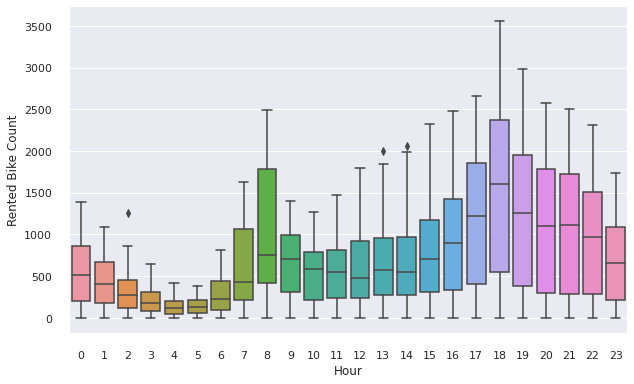

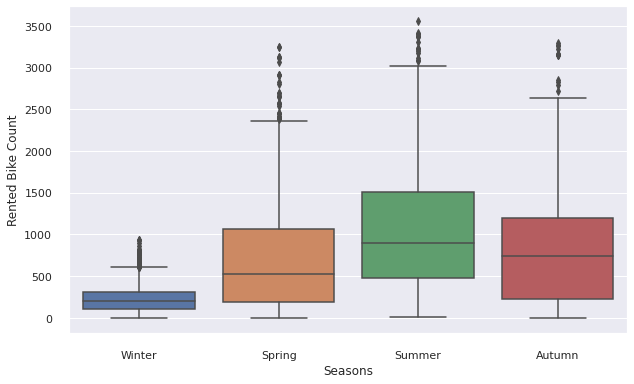

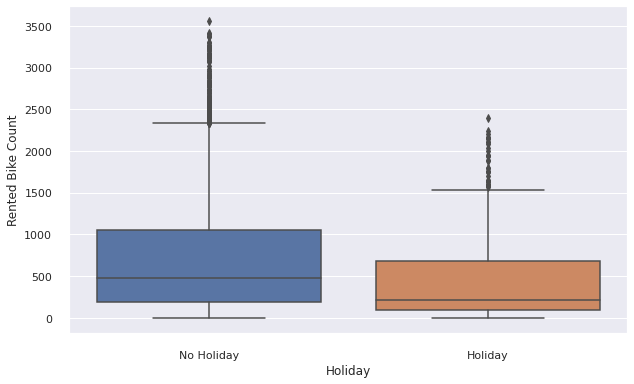

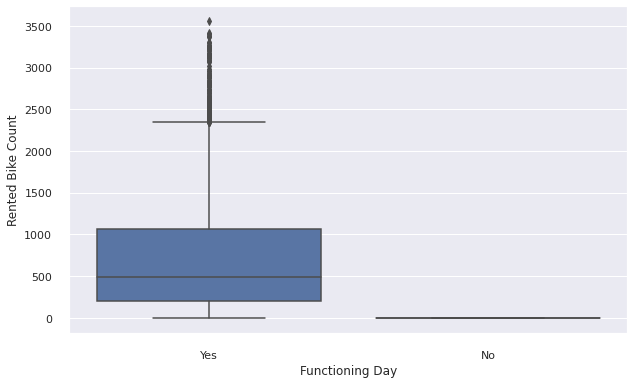

In [37]:
# plotting the box plot for categorical_features
for feature in categorical_features[1:]:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = seoul_df['Rented Bike Count'], x = seoul_df[feature])
    plt.ylabel('Rented Bike Count')
plt.show()

Text(0, 0.5, 'Rented Bike Count')

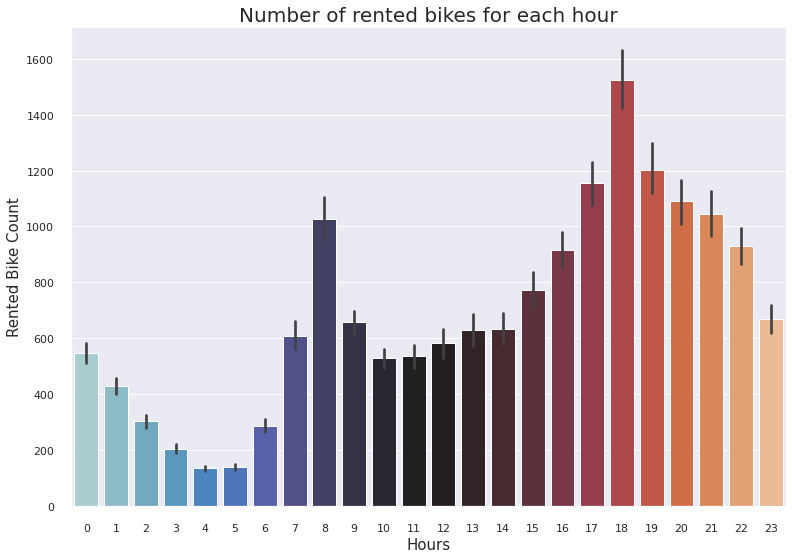

In [38]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = seoul_df['Hour'],
    y = seoul_df['Rented Bike Count'],
    palette = ('icefire')
)
plt.title('Number of rented bikes for each hour', fontsize = 20)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Rented Bike Count', fontsize = 15)

Inference: <br>
* From the above graph, we can see that the bikes are in high demand in the evening with a peak time at 6 pm.
* The demand is high at 8 am in the morning as well.

Text(0.5, 1.0, 'Rented bike count according to the Seasons')

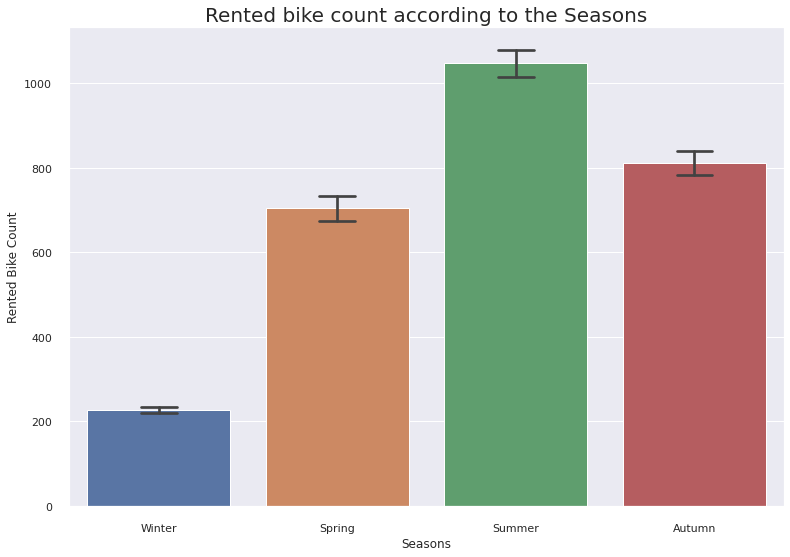

In [39]:
# plotting the bar plot
sns.barplot(data= seoul_df,x='Seasons',y='Rented Bike Count',capsize=.2)
plt.title('Rented bike count according to the Seasons',fontsize=20)


*  The demand for rented bikes is high in summer followed by Autumn.
*  Demand for rented bikes is the least in the winter season.

[Text(0.5, 1.0, 'Count according to seasons')]

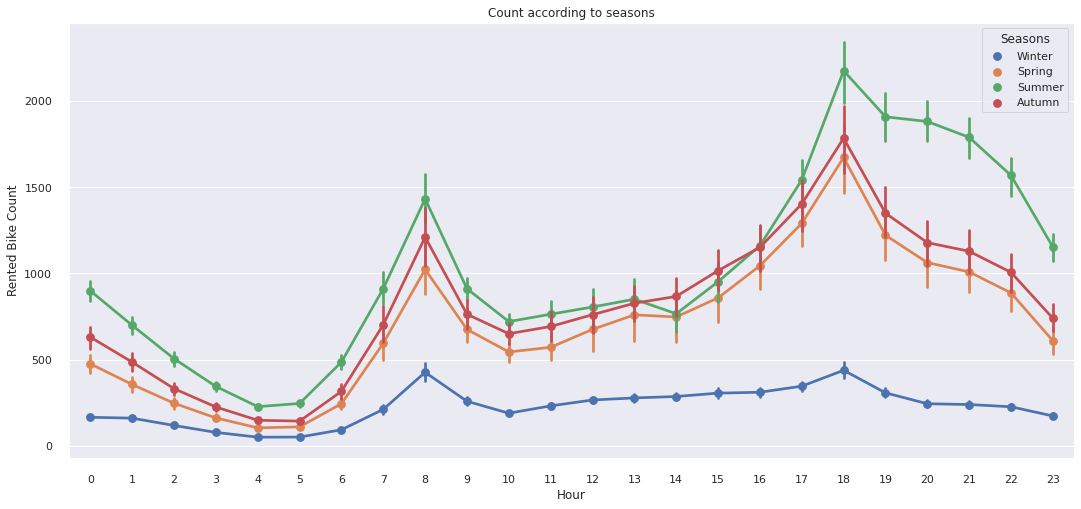

In [40]:
# plotting the graph
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=seoul_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count according to seasons')

From the above plot, we can see that  

*   The demand for rented bikes for all the seasons except winter is high during the evening specifically at 6 pm.
*   The demand for rented bikes is high in summers and low in winters.



Text(0.5, 1.0, 'Rented bike count on holidays')

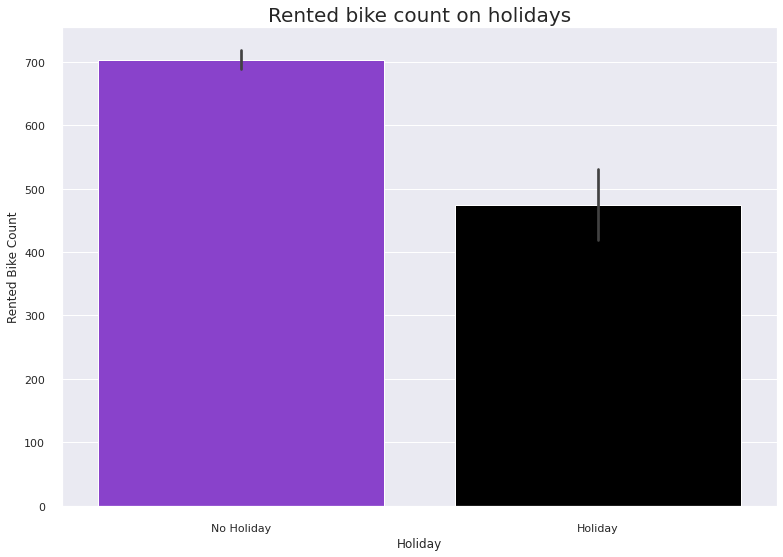

In [41]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = seoul_df['Holiday'],
    y = seoul_df['Rented Bike Count'],
    palette = ['blueviolet', 'black']
)
plt.title('Rented bike count on holidays', fontsize = 20)

Inference: <br>
During holidays the demand for rented bikes is less compared to when there are no holidays.  

Text(0.5, 1.0, 'Rented bike count on holidays for every hour')

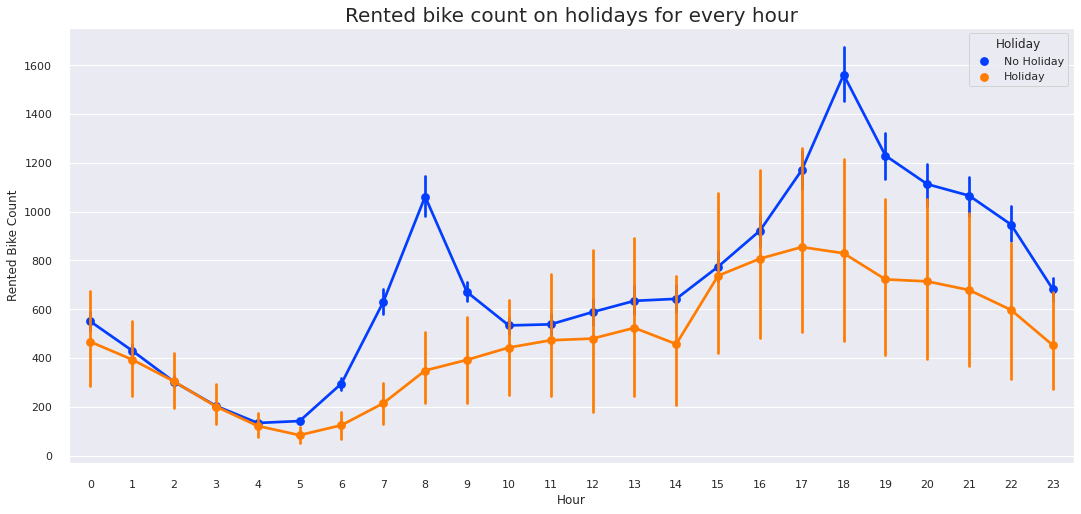

In [42]:
# setting seaborn plotting aesthetics for creating a pointplot
fig, ax = plt.subplots(figsize=(18,8))
sns.pointplot(
    x = seoul_df['Hour'],
    y = seoul_df['Rented Bike Count'],
    hue = seoul_df['Holiday'],
    palette = sns.color_palette('bright')
)
plt.title('Rented bike count on holidays for every hour', fontsize = 20)

Inference:


*  When there is no holiday, we can see 2 spikes in the graph one at 8 am and one at 6 pm. So in the morning and evening, the demand for rented bikes is high.
*  When there are holidays the demand is quite low during the entire day.



[Text(0.5, 1.0, 'count of rented bikes according to functioning day ')]

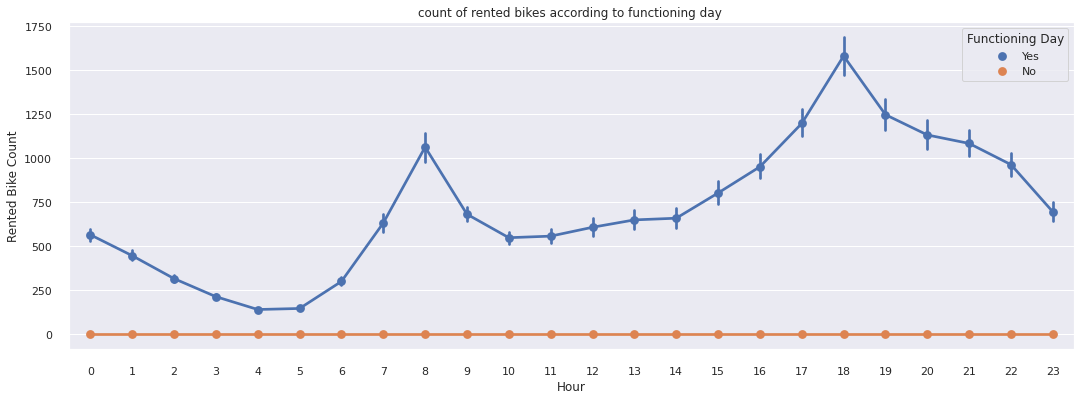

In [43]:
# plotting the graph
fig,ax=plt.subplots(figsize=(18,6))
sns.pointplot(data=seoul_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='count of rented bikes according to functioning day ')

Rented bike count is high on functioning days whereas it is zero on non-functioning data

### Feature Engineering

In [44]:
# making a copy of the dataset
seoul_df_engg = seoul_df.copy()

In [45]:
# converting Date into datetime
seoul_df_engg['Date'] = seoul_df_engg['Date'].apply(lambda x: dt.strptime(x,"%d/%m/%Y"))

In [46]:
# fetching year, month and day from Date
seoul_df_engg['year'] = seoul_df_engg['Date'].dt.year
seoul_df_engg['month'] = seoul_df_engg['Date'].dt.month
seoul_df_engg['day'] = seoul_df_engg['Date'].dt.day_name()

In [47]:
# creating weekdays_weekend feature
seoul_df_engg['weekdays_weekend'] = seoul_df_engg['day'].apply(lambda x : 1 if x == 'Saturday' or x == 'Sunday' else 0)

In [48]:
# dropping the Date, day and year columns
seoul_df_engg=seoul_df_engg.drop(columns=['Date','day','year'],axis=1)

In [49]:
# converting the type ofmonth and weekdays_weekend columns into category
cols = ['month','weekdays_weekend']
for col in cols:
  seoul_df_engg[col] = seoul_df_engg[col].astype('category')

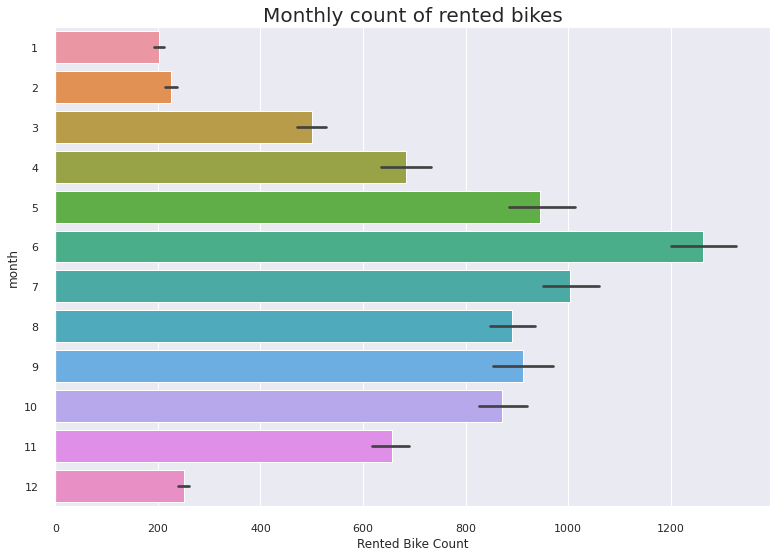

In [50]:
# plotting the row graph
sns.barplot(y='month',x='Rented Bike Count',data=seoul_df_engg,orient='h')
plt.title('Monthly count of rented bikes', fontsize = 20)
plt.show()

*   During June month, the demand for bikes is high followed by July and May. 
*   Demand is lowest in December, January and February.

Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekends')

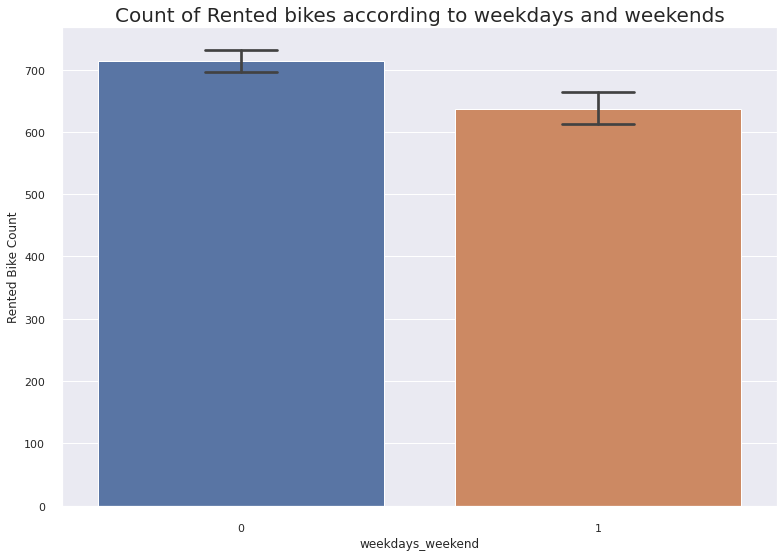

In [51]:
# plotting the bar graph
sns.barplot(data=seoul_df_engg,x='weekdays_weekend',y='Rented Bike Count',capsize=.2)
plt.title('Count of Rented bikes according to weekdays and weekends', fontsize = 20)

The demand for bikes is more on weekdays than weekends

In [52]:
#label encoding
encoders = {
    'Holiday': {'Holiday': 1, 'No Holiday': 0},
    'Functioning Day': {'Yes': 1, 'No': 0}
}
seoul_df_engg.replace(encoders, inplace = True)

In [53]:
# hot encoding
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in ['Hour', 'Seasons', 'month']:
    seoul_df_engg = one_hot_encoding(seoul_df_engg, col)
seoul_df_engg.head(2)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
seoul_df_engg.columns

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Holiday', 'Functioning Day', 'weekdays_weekend', 'Hour_0',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

## Splitting data into train and test set

In [55]:
# combining numerical and categorical features
features = [column for column in seoul_df_engg.columns if column not in ['Rented Bike Count', 'Dew point temperature']]

In [56]:
# fetching independent variables
X = seoul_df_engg[features]

In [57]:
# Taking square root of our dependent variable
y = np.sqrt(seoul_df_engg['Rented Bike Count'])

In [58]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6061, 50)
(2021, 50)


In [59]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8082 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8082 non-null   object  
 1   Rented Bike Count      8082 non-null   int64   
 2   Hour                   8082 non-null   category
 3   Temperature            8082 non-null   float64 
 4   Humidity               8082 non-null   int64   
 5   Wind speed             8082 non-null   float64 
 6   Visibility             8082 non-null   int64   
 7   Dew point temperature  8082 non-null   float64 
 8   Solar Radiation        8082 non-null   float64 
 9   Rainfall               8082 non-null   float64 
 10  Snowfall               8082 non-null   float64 
 11  Seasons                8082 non-null   object  
 12  Holiday                8082 non-null   object  
 13  Functioning Day        8082 non-null   object  
dtypes: category(1), float64(6), int64(3), ob

## **Regression Models**

In [60]:
# using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementing Linear Regression

In [61]:
# fitting linear regression on training dataset
reg = LinearRegression().fit(X_train, y_train)

In [62]:
# printing the bias term
reg.intercept_

23.15367561300377

In [63]:
# printing the weights of the features
reg.coef_

array([ 6.22502678e+00, -2.31482147e+00,  1.55482461e-01,  4.22803462e-01,
        6.93707991e-01, -2.11819580e+00, -6.00255229e-02, -7.08493400e-01,
        5.45626842e+00, -8.36353616e-01,  2.39176746e+13,  2.38743920e+13,
        2.43030581e+13,  2.36126975e+13,  2.44298929e+13,  2.41754187e+13,
        2.41326912e+13,  2.32582919e+13,  2.40039591e+13,  2.38743920e+13,
        2.35687438e+13,  2.08308927e+13,  2.06264386e+13,  2.00519067e+13,
        2.02629706e+13,  2.15778825e+13,  2.37003131e+13,  2.39608635e+13,
        2.37003131e+13,  2.51746813e+13,  2.45140086e+13,  2.47642793e+13,
        2.41326912e+13,  2.42606016e+13, -7.15395440e+12,  3.06622687e+13,
        2.20544602e+13,  1.08295643e+14, -2.02899178e+12, -1.90924402e+12,
        4.70629661e+13,  4.45868541e+13,  4.51150169e+13,  4.97301813e+13,
        5.23384087e+13,  5.19636930e+13,  7.03988614e+13,  7.31520118e+13,
        7.22306161e+13, -1.98235942e+12])

In [64]:
# predicting on training set
y_train_pred = reg.predict(X_train)

In [65]:
# predicting on test set
y_test_pred = reg.predict(X_test)

In [66]:
# function for adjusted R2
def adjusted_r2_score(actual, predicted, n, k):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [67]:
# evaluation metrics for regression models
def reg_eval_metrics(actual, predicted):
  print(f'MSE: {mean_squared_error(actual, predicted)}')
  print(f'RMSE: {math.sqrt(mean_squared_error(actual, predicted))}')
  print(f'MAE: {mean_absolute_error(actual, predicted)}')
  print(f'R2: {r2_score(actual, predicted)}')
  print(f'Adjusted R2: {adjusted_r2_score(actual, predicted, len(actual), len(features))}')

In [68]:
# evaluating our model on training data
reg_eval_metrics(np.square(y_train), np.square(y_train_pred))

MSE: 94976.90138308439
RMSE: 308.18322696584966
MAE: 209.86672481683206
R2: 0.7836704140187147
Adjusted R2: 0.7818706670471567


In [69]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_test_pred))

MSE: 92653.40379245035
RMSE: 304.3902163218298
MAE: 208.32012921035465
R2: 0.7682432377375812
Adjusted R2: 0.7623610864111239


Inference: <br>
For our problem statement, the R2-score metric will tell us how much independent variables will be able to explain the dependent variable. An adjusted R2 score will tell us whether the new features we have added are trivial or not.
<br>
As we can see that there is not much difference between R2 and adjusted R2 so our features are significant to our model.


In [70]:
# evaluating our model score by cross-validation technique
accuracies = cross_val_score(reg, X_train, y_train, cv = 10)
print('Cross val score for Training Data:', accuracies.mean()*100)

Cross val score for Training Data: 79.26409655795959


### Normality of the residuals

Text(0.5, 1.0, 'Residual Analysis')

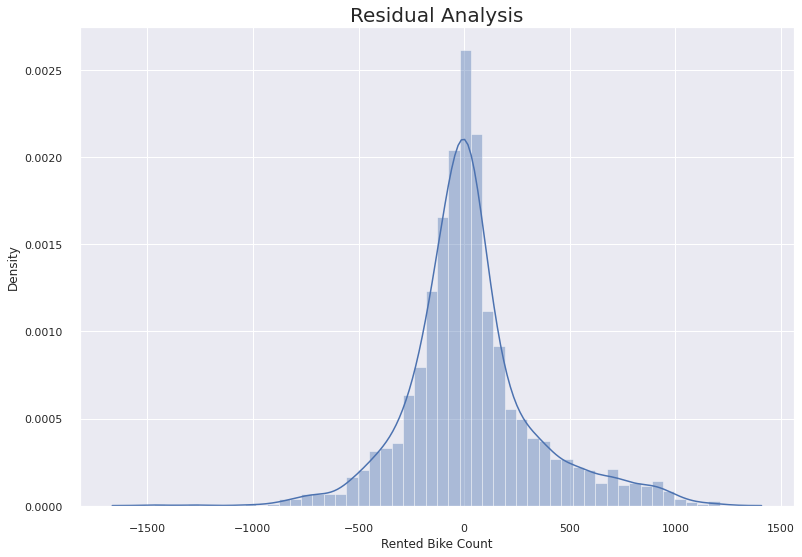

In [71]:
# checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_test_pred), bins = 50)
plt.title('Residual Analysis', fontsize = 20)

Inference: <br>
We can see that residuals are normally distributed.

### Checking the heteroscedasticity

In [72]:
mean_of_residuals = np.mean(y_test_pred - y_test)
mean_of_residuals

0.03064349704978381

Text(0, 0.5, 'Residuals')

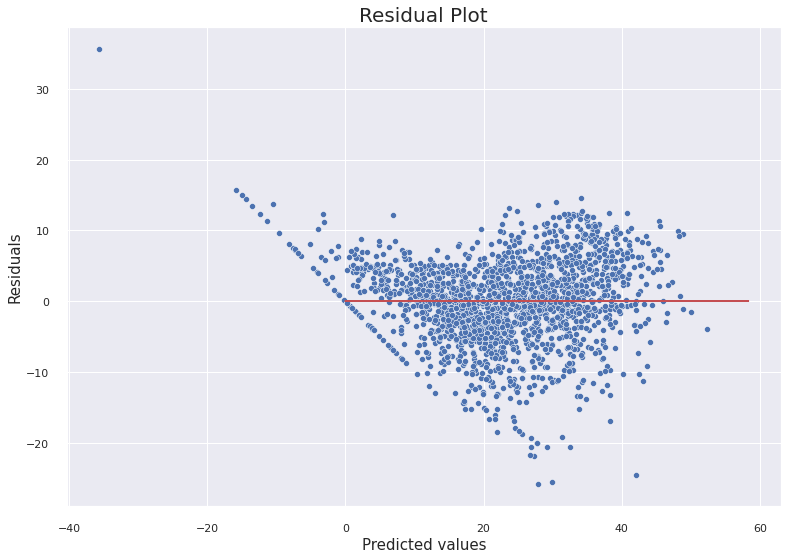

In [73]:
# scatter plot for residuals
sns.scatterplot(x = y_test_pred, y = y_test - y_test_pred)
plt.plot(y_test, [0]*len(y_test), c = 'r')
plt.title('Residual Plot', fontsize = 20)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)

Inference: <br>
We see that the residuals are not centered around the horizontal line at zero.

## Implementing Polynomial Regression

In [74]:
# creating an instance of PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree = 2, include_bias = True)

In [75]:
# transforming the existing features to higher degree features
X_train_poly_features = poly.fit_transform(X_train)

In [76]:
# fitting the transformed features to Linear Regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly_features, y_train)

LinearRegression()

In [77]:
# predicting on training set
y_train_pred = poly_reg_model.predict(X_train_poly_features)

In [78]:
# predicting on test set
y_test_pred = poly_reg_model.predict(poly.fit_transform(X_test))

In [79]:
# evaluating our model on training data
reg_eval_metrics(np.square(y_train), np.square(y_train_pred))

MSE: 28389.664723228707
RMSE: 168.49232838093462
MAE: 101.63207436756537
R2: 0.9353366521092108
Adjusted R2: 0.9347986874844955


In [80]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_test_pred))

MSE: 34720.99476580314
RMSE: 186.33570448468308
MAE: 117.37459935096749
R2: 0.9131513252607715
Adjusted R2: 0.9109470441760195


Inference: <br>
R2-score on unseen data

*   for linear regression: **0.7682432377375812**
*   for 2nd-degree polynomial regression is **0.9131513252607715**

Hence we see a significant increase in the r2-score which explains that there is a non-linear relationship between the dependent and independent variables in our dataset.
<br>
Also, the root_mean_square_error and mean_absolute_error have been decreased for polynomial regression in comparison to linear regression.

### Checking the homoscedasticity

In [81]:
mean_of_residuals = np.mean(y_test_pred - y_test)
mean_of_residuals

0.02132886377835526

Yes, the mean of residuals is almost zero!

Text(0, 0.5, 'Residuals')

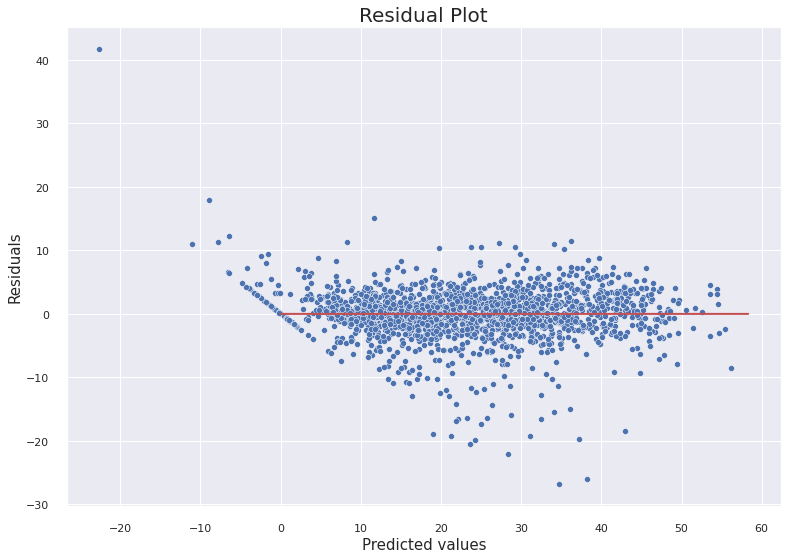

In [82]:
# scatter plot for residuals
sns.scatterplot(x = y_test_pred, y = y_test - y_test_pred)
plt.plot(y_test, [0]*len(y_test), c = 'r')
plt.title('Residual Plot', fontsize = 20)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)

Inference: <br>
From the above graph of residuals, we see:


*   there are not any clear patterns.
*   they are mostly centered around horizontal line at zero.
*   they’re clustered around the lower digits of the y-axis.

### Implementing Lasso regression

In [83]:
# fitting lasso regression on training dataset
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [84]:
# printing the weights of the features
lasso.coef_

array([ 5.0438592 , -2.17133222,  0.        ,  0.        ,  0.        ,
       -1.27540326, -0.        , -0.        ,  4.03352861, -0.        ,
       -0.        , -0.        , -0.270819  , -0.70277684, -1.22893386,
       -1.12490796, -0.23011297,  0.        ,  0.50538586,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.07781412,  1.15131895,  0.48892222,
        0.24211265,  0.30381251,  0.        ,  0.        ,  0.33539974,
       -0.        ,  0.        , -1.52428551, -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.506909  , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [85]:
# predicting on training and test set
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [86]:
# evaluating our model on training data
reg_eval_metrics(np.square(y_train), np.square(y_pred_train_lasso))

MSE: 197460.81588895767
RMSE: 444.36563310966983
MAE: 297.39000379262995
R2: 0.5502420491010782
Adjusted R2: 0.5465003024213867


In [87]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_test_lasso))

MSE: 179092.35603361562
RMSE: 423.1930481867768
MAE: 284.6044289170446
R2: 0.552030871167184
Adjusted R2: 0.5406610963237115


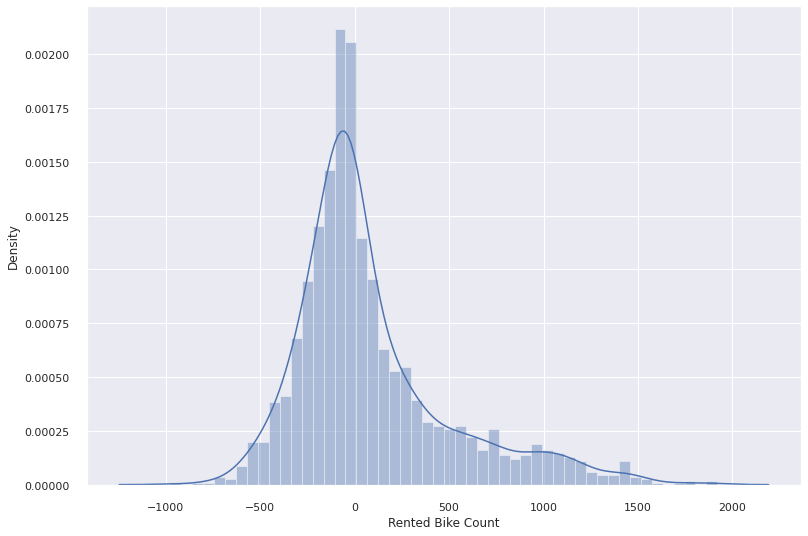

In [88]:
# checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_pred_test_lasso), bins = 50)

From the above graph we see that the distribution is positively skewed.

In [89]:
# hyperparameter tuning
lasso = Lasso()
parameters = {'max_iter': [100, 500, 1000], 'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100],
                         'max_iter': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [90]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'max_iter': 500}

Using  {'alpha': 0.001, 'max_iter': 500}  the negative mean squared error is:  -33.2559113888446


In [91]:
# predicting on test set
y_pred_lasso = lasso_regressor.predict(X_test)

In [92]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_lasso))

MSE: 92892.8673380389
RMSE: 304.78331210556604
MAE: 208.257600566763
R2: 0.7676442603257011
Adjusted R2: 0.7617469065268611


After hyperparameter tuning, RMSE and MAE are reduced significantly for lasso regression. Also, the R2-score has been increased by 20% but its value is way less than the R2-score of polynomial regression.

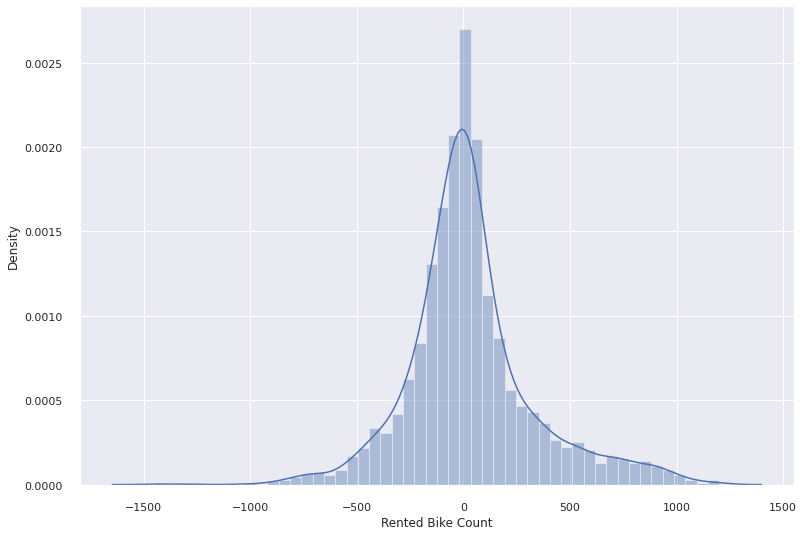

In [93]:
# Checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_pred_lasso), bins = 50)

From the above distribution, we can see that the skewness has been removed for the lasso after hyperparameter tuning. Now it is more normally distributed.

### Implementing Ridge regression

In [94]:
# fitting ridge regression on training dataset
ridge= Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [95]:
ridge.coef_

array([ 6.19595069, -2.33616448,  0.13955604,  0.39588979,  0.70662401,
       -2.14023971, -0.02513951, -0.7447199 ,  5.48976165, -0.81063378,
       -0.02863117, -0.49427398, -1.02857807, -1.44869403, -1.96516627,
       -1.84596219, -0.94181173,  0.41984565,  1.60354415,  0.18159091,
       -0.68862189, -0.49583012, -0.387486  , -0.4286359 , -0.55368273,
       -0.35833148, -0.12826119,  0.80434202,  2.02093793,  1.44714716,
        1.26017831,  1.352564  ,  0.99144112,  0.31679025,  0.8310591 ,
        0.07268757, -0.13722943, -0.76670266, -0.52763111, -0.7323224 ,
       -0.39879343, -0.08566129,  0.61635931,  1.28427229, -0.37303044,
       -1.06665966, -0.037749  ,  0.78866945,  0.52945364,  0.05452764])

In [96]:
# predicting on training and test set
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [97]:
# evaluating our model on training data
reg_eval_metrics(np.square(y_train), np.square(y_pred_train_ridge))

MSE: 95205.44082441159
RMSE: 308.5537891914659
MAE: 209.84515140275636
R2: 0.7831498680543513
Adjusted R2: 0.7813457904175323


In [98]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_test_ridge))

MSE: 92875.91940735908
RMSE: 304.75550759151025
MAE: 208.25416138904723
R2: 0.7676866526974935
Adjusted R2: 0.761790374847176


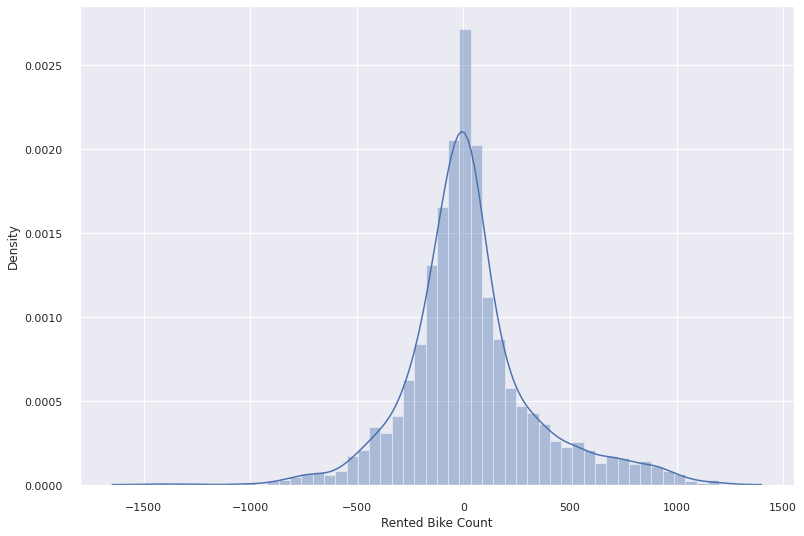

In [99]:
# Checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_pred_test_ridge), bins = 50)

We can see that residuals are normally distributed when we use ridge regression.

In [100]:
# hyperparameter tuning
ridge = Ridge()
parameters = {'max_iter': [100, 500, 1000, 5000, 10000], 'alpha': [1e-10,1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,20,30,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 60, 100],
                         'max_iter': [100, 500, 1000, 5000, 10000]},
             scoring='neg_mean_squared_error')

In [101]:
# finding the best value for alpha
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 5, 'max_iter': 100}


In [102]:
# predicting on test set
y_pred_ridge = ridge_regressor.predict(X_test)

In [103]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_ridge))

MSE: 92898.65981639555
RMSE: 304.7928145747461
MAE: 208.28786988786354
R2: 0.7676297714243282
Adjusted R2: 0.7617320498868746


After hyperparameter tuning we don't see any significant change in R2-score for ridge regression. Also the RMSE and MAE are almost same before and after tuning.

### Implementing elastic net

In [104]:
# fitting elastic net on training dataset
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)

ElasticNet()

In [105]:
# predicting on training and test set
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [106]:
# evaluating our model on training data
reg_eval_metrics(np.square(y_train), np.square(y_pred_train_en))

MSE: 196998.62125117582
RMSE: 443.84526723980713
MAE: 296.79748767686414
R2: 0.5512947932228391
Adjusted R2: 0.5475618048137114


In [107]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_test_en))

MSE: 179652.49525377314
RMSE: 423.85433258818193
MAE: 285.0853513579629
R2: 0.5506297779880202
Adjusted R2: 0.5392244424039598


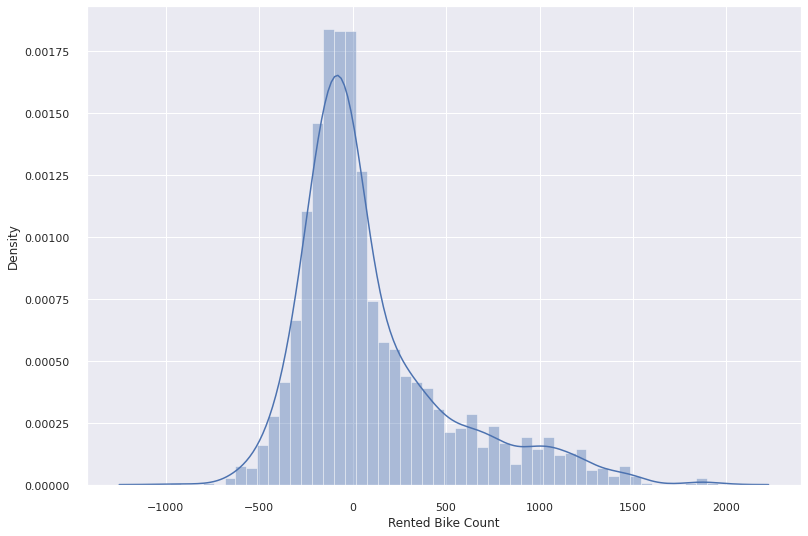

In [108]:
# checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_pred_test_en), bins = 50)

We can see the positive skewness in the distribution of residuals for elasticnet

In [109]:
# hyperparameter tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 40, 50, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [110]:
# finding the best value for alpha
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.4}


In [111]:
# predicting on test set
y_pred_elastic = elastic_regressor.predict(X_test)

In [112]:
# evaluating our model on test data
reg_eval_metrics(np.square(y_test), np.square(y_pred_elastic))

MSE: 92898.92462153142
RMSE: 304.7932489763043
MAE: 208.2799568695203
R2: 0.7676291090592298
Adjusted R2: 0.7617313707104792


After hyperparameter tuning, R2-score for elastic net increased by 20%.
<br>
For all the regularization techniques like lasso, ridge and elasticnet the R2-score comes out to be around 0.76 after tuning with almost the same RMSE and MAE. 

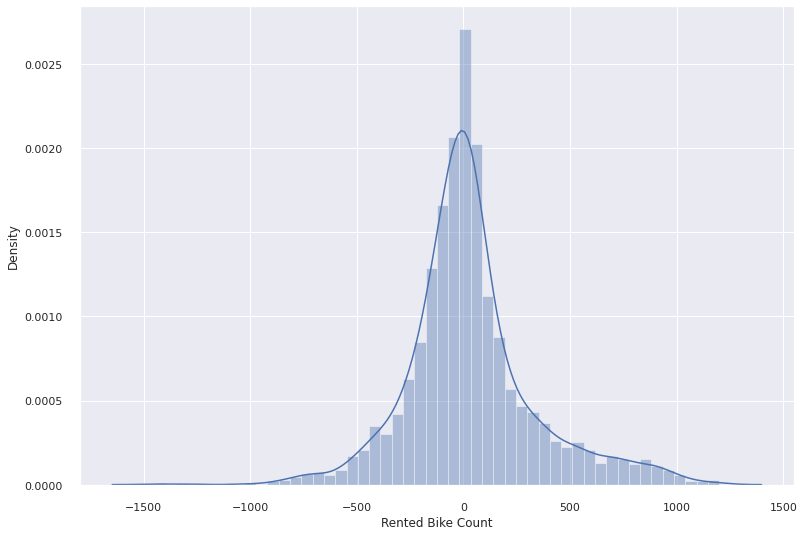

In [113]:
# checking for normality of the residuals
sns.distplot(np.square(y_test) - np.square(y_pred_elastic), bins = 50)

Now the residuals are normally distributed.

## Implementing Decision Tree Regressor

#### Unlike linear regression decision trees have no prior assumptions, so we don't have to standardize our variables. Plus we don't have to take the square-root of our dependent variable to make it normally distributed.


In [114]:
# fetching independent variables
X = seoul_df_engg[features]

In [115]:
# fetching dependent variable
y = seoul_df_engg['Rented Bike Count']

In [116]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6061, 50)
(2021, 50)


In [117]:
# fitting decision tree regressor on training dataset
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
# predicting on test set
y_pred = dt_reg.predict(X_test)

In [119]:
# evaluating our model on test dataset
reg_eval_metrics(y_test, y_pred)

MSE: 77235.10687778327
RMSE: 277.9120488172171
MAE: 162.0529440870856
R2: 0.80680949031205
Adjusted R2: 0.8019061778834218


In [120]:
# evaluating our model score by cross-validation technique
accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 10)
print('Cross val score for Training Data:', accuracies.mean()*100)

Cross val score for Training Data: 81.91268964877622


### Using GridSearchCV for hyperparameter tuning

In [121]:
# hyperparameter tuning using GridSearchCV
dtr = DecisionTreeRegressor()
criterion = ['squared_error', 'absolute_error']
max_depth = [25, 50, 100, 150, 200, 300]
min_samples_split = np.arange(2, 20, 3)
max_leaf_nodes = np.arange(200, 300, 20)
hyperparameters = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'max_leaf_nodes': max_leaf_nodes}
predictor = GridSearchCV(dtr, hyperparameters, cv = 5, verbose = 0)
predictor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [25, 50, 100, 150, 200, 300],
                         'max_leaf_nodes': array([200, 220, 240, 260, 280]),
                         'min_samples_split': array([ 2,  5,  8, 11, 14, 17])})

In [122]:
print("The best fit values are found out to be :", predictor.best_params_)

The best fit values are found out to be : {'criterion': 'absolute_error', 'max_depth': 50, 'max_leaf_nodes': 280, 'min_samples_split': 14}


In [123]:
# predicting on test set
y_pred = predictor.predict(X_test)

In [124]:
# evaluating our model on test set after hyperparameter tuning
reg_eval_metrics(y_test, y_pred)

MSE: 57573.09871350817
RMSE: 239.94394910792846
MAE: 146.5526966848095
R2: 0.8559906662344929
Adjusted R2: 0.8523356070018658


Inference: <br>
We see that the R2-score for our decision tree increased significantly after hyperparameter tuning.

In [125]:
# evaluating a score by cross-validation technique
accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 10)
print('Cross val score after hyperparameter tuning:', accuracies.mean()*100)

Cross val score after hyperparameter tuning: 82.48570795403474


<br>

## Conclusion:

*   People prefer rented bikes when the temperature is high and humidity is low.

*   During the entire day, the demand is high in the morning and even higher in the evening.

*   People like to take rented bikes when rainfall and snowfall are low.

*   When there is no holiday, the demand is high specifically at 8 am and 6 pm. When there are holidays the demand is quite low during the entire day.

*   The demand is high in summer with the highest demand in the month of June followed by July and May whereas the demand is lowest in the winter season i.e. during the month of December, January and February.


*   The R2 score for linear regression and all the regularization techniques like lasso, ridge and elastic net after hyperparameter tuning is almost the same which is around 0.76
*   For decision tree, the R2 score comes out to be 0.84. Also, the RMSE and MAE are comparatively low from other regression algorithms.
*   2nd-degree polynomial regression has the highest value of R2 score of 0.91 which means there is a non-linear relationship between the dependent and independent variables. It has also got the lowest RMSE and MAE values among all the models.


